LOAN DEFAULT PREDICTION

In [3]:
#Importing all necessary libraries
import numpy as np 
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

NumPy is a Python library used for working with arrays. 
Pandas is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data. 
Seaborn is a library mostly used for statistical plotting in Python. It is built on top of Matplotlib and provides beautiful default styles and color palettes to make statistical plots more attractive.


In [5]:
#Importing the dataset
data = pd.read_csv('C:/Users/Tisha/OneDrive/Desktop/ml_task/Default_Fin.csv')

In [6]:
data

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


Shows number of rows and columns in the dataset

Ques_1 What is the number of people who will be given a grace period of exactly 15 days?

In [9]:
count=len(data[(data["Defaulted?"]==1) & (data["Annual Salary"]>100000) & (data["Bank Balance"]>5000) & (data["Employed"]!=0)])
print(count)

206


There are 206 people with grace period of exactly 15 days.

Ques_2 Find the maximum fine that can be levied by the bank in the period of 15 days.

In [10]:
maxBalance=data["Bank Balance"][(data["Defaulted?"]==1) & (data["Annual Salary"]>100000) & (data["Bank Balance"]>5000)].max()
maxFine=(2.5*maxBalance*15)/100
print(maxFine)

11944.44


Formula for maximum fine = (2.5 * maxBalance * 15) / 100
Maximum fine that can be levied by the bank in the period of 15 days is: 11944.44

Ques3: Assuming that all the people falling into the category of defaulters have not paid their EMI in the grace period, what is the total amount being generated by the bank as a part of the fine.

In [11]:
sum=0
for i in data.Index:
 if data.loc[i-1,'Defaulted?']==0:
   sum+=(2.5*data.loc[i-1,'Bank Balance']*15)/100
print(round(sum,4))

34972758.9


The total amount generated as a part of the fine will be 34972758.9 assuming that all people fall into the category of defaulters have not paid their EMI in the grace time period.

Ques_4: Use a suitable plot to show the difference in bank balance of the people who are not eligible for a grace period, and those who are.

In [12]:
data['Grace?']=((data['Defaulted?']==1) & (data['Bank Balance']>5000) & (data["Annual Salary"]>100000)).astype(int)
data['Grace?'].value_counts()

0    9667
1     333
Name: Grace?, dtype: int64

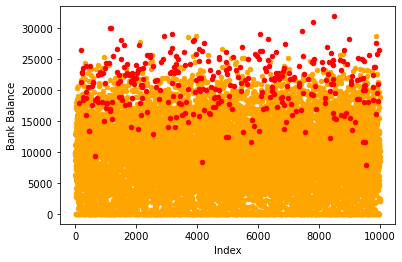

In [26]:
#plot of people who are not eligible for grace
data[data['Grace?'] == 0].plot(kind = "scatter", x = "Index", y = "Bank Balance", color = "orange", ax=plt.gca())

#plot of people who are eligible for grace
data[data['Grace?'] == 1].plot(kind = "scatter", x = "Index", y = "Bank Balance", color = "red", ax=plt.gca())

plt.show()

333 People are eligible for the grace period and 9667 people are not eligible for it.
Given below is a scatter plot wherein orange color shows those people who are not eligible for grace period and red color shows those who are not.

Ques_5: Find the difference between the median of the bank balance of those people who are eligible for Grace Period and the original value.

In [14]:
median1=data["Bank Balance"].median()
median2=data["Bank Balance"][(data["Annual Salary"]>100000) & (data["Bank Balance"]>5000)].median()
difference=median2-median1
print(round(difference,4))

1614.42


The difference between the median of the bank balance of those people who are eligible for Grace Period and the original value is 1614.42.

Quest_6: Use a suitable graph to show the changes in the annual income of those people who are eligible for grace period and those who are not.

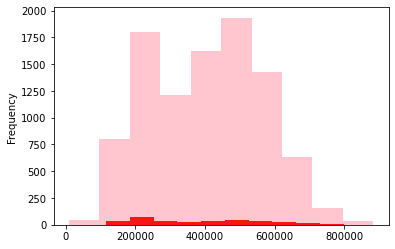

In [19]:
#plot of people who are not eligible for the grace period
non_eligible_people=data.loc[data["Grace?"]==0,"Annual Salary"]
non_eligible_people.plot.hist(color="pink",alpha=0.9)

# plot of people who are eligible for the grace period
eligible_people=data.loc[data["Grace?"]==1,"Annual Salary"]
eligible_people.plot.hist(color="red",alpha=0.9)

plt.show()


In the above histogram red color shows the changes in the annual income of those people who are eligible for grace period while pink color shows the changes in the annual income of those people who are not eligible for grace period